<a href="https://colab.research.google.com/github/somitrasingh/deeplearning/blob/main/Pytorch_with_ADAM_minibatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd
import kagglehub
import os
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
path = kagglehub.dataset_download("gabrielsantello/cars-purchase-decision-dataset")
csv_path = os.path.join(path, 'car_data.csv')
data = pd.read_csv(csv_path)

In [24]:
from sklearn.preprocessing import StandardScaler


In [25]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data = data.drop('User ID', axis=1)

In [26]:
X = data[['Gender', 'Age', 'AnnualSalary']]  # Features
Y = data['Purchased']  # Target

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
Y_test = Y_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.reshape(Y_test.shape[0], 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 3)
(200, 3)
(800, 1)
(200, 1)


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [31]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

In [35]:
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

In [36]:
class TwoLayerNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(TwoLayerNet, self).__init__()
    self.linear = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, output_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.linear(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out


In [37]:
hidden_size = 5
model = TwoLayerNet(X_train.shape[1], hidden_size,  Y_train.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)


In [38]:
num_epochs = 5000
for epochs in range(num_epochs):
  y_hat = model(X_train)
  loss = criterion(y_hat, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epochs+1) % 500 == 0:
    print(f"Loss after {epochs+1} steps: {loss.item():.4f}")


Loss after 500 steps: 0.4898
Loss after 1000 steps: 0.3178
Loss after 1500 steps: 0.2831
Loss after 2000 steps: 0.2689
Loss after 2500 steps: 0.2625
Loss after 3000 steps: 0.2587
Loss after 3500 steps: 0.2552
Loss after 4000 steps: 0.2527
Loss after 4500 steps: 0.2510
Loss after 5000 steps: 0.2498


In [17]:
with torch.no_grad():
  y_hat = model(X_test)
  y_predicted = y_hat.round()
  acc = (y_predicted == Y_test).sum().item() / Y_test.size(0)
  print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8650


In [18]:
from torch.utils.data import DataLoader, TensorDataset

**Adam with mini batch**


In [48]:
train_dataset = TensorDataset(X_train.cpu(), Y_train.cpu())
loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)


In [59]:
num_epochs = 10
losses = []
for epoch in range(num_epochs):
  for batch_idx, (data, label) in enumerate(loader):
    data = data.to(device)
    label = label.to(device)
    y_hat = model(data)
    loss = criterion(y_hat, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (batch_idx + 1) % 12 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(loader)}], Loss: {loss.item():.4f}")
            losses.append(loss.item())


Epoch [1/10], Batch [12/25], Loss: 0.1536
Epoch [1/10], Batch [24/25], Loss: 0.1882
Epoch [2/10], Batch [12/25], Loss: 0.2817
Epoch [2/10], Batch [24/25], Loss: 0.2203
Epoch [3/10], Batch [12/25], Loss: 0.4224
Epoch [3/10], Batch [24/25], Loss: 0.4081
Epoch [4/10], Batch [12/25], Loss: 0.1612
Epoch [4/10], Batch [24/25], Loss: 0.4165
Epoch [5/10], Batch [12/25], Loss: 0.4136
Epoch [5/10], Batch [24/25], Loss: 0.2602
Epoch [6/10], Batch [12/25], Loss: 0.1594
Epoch [6/10], Batch [24/25], Loss: 0.3137
Epoch [7/10], Batch [12/25], Loss: 0.2319
Epoch [7/10], Batch [24/25], Loss: 0.1648
Epoch [8/10], Batch [12/25], Loss: 0.1790
Epoch [8/10], Batch [24/25], Loss: 0.1540
Epoch [9/10], Batch [12/25], Loss: 0.3334
Epoch [9/10], Batch [24/25], Loss: 0.1603
Epoch [10/10], Batch [12/25], Loss: 0.1330
Epoch [10/10], Batch [24/25], Loss: 0.1110


In [60]:
print(type(losses))

<class 'list'>


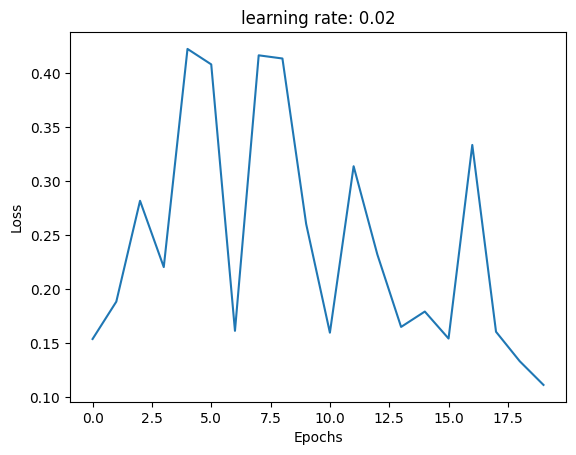

In [62]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('learning rate: ' + str(0.02))
plt.show()

In [63]:
with torch.no_grad():
  y_prediction = model(X_test)
  y_prediction = y_prediction.round()
  acc = (y_predicted == Y_test).sum().item() / Y_test.size(0)
  print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8650
